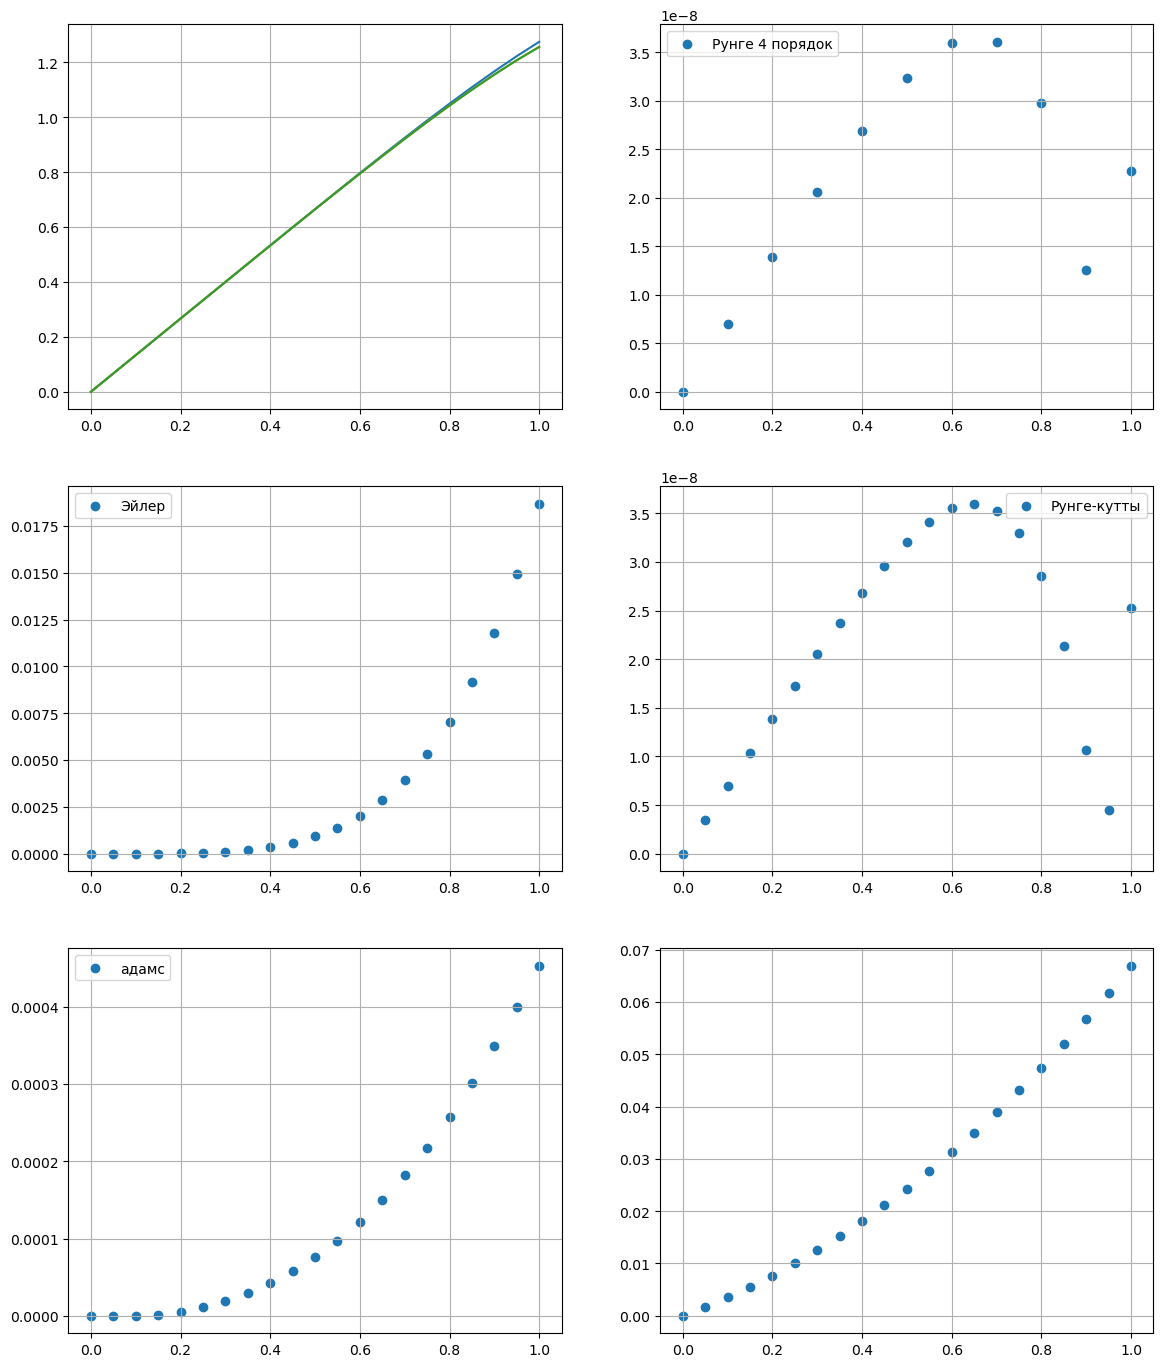

In [3]:
import numpy as np
import matplotlib.pyplot as plt

h1 = 0.05
h2 = 2*h1
a = 0
b = 1
f1 = lambda y: y
f2 = lambda x, y, u: np.tanh(x)*y - ((np.cosh(x))**(2))*u + (x*(np.cosh(x))**(2) - np.tanh(x))/3
f_real = lambda x: np.sin(np.sinh(x)) + x/3
x1 = np.arange(a,b+h1,h1)
x2 = np.arange(a,b+h2,h2)
real_val = f_real(x1)
def eiler(x, h):
    y = [4/3]
    u = [0]
    for i in range(1,len(x)):
        y.append(y[i-1] + h*f2(x[i-1],y[i-1],u[i-1]))
        u.append(u[i-1] + h*f1(y[i-1]))
    return np.array(u)

def r_k4(x, h):
    y = [4/3]
    u = [0]
    for i in range(1,len(x)):
        k1, q1 = f2(x[i-1], y[i-1], u[i-1]), f1(y[i-1]) 
        k2, q2 = f2(x[i-1] + h/2, y[i-1] + h*k1/2, u[i-1] + h*q1/2), f1(y[i-1] + h*k1/2)
        k3, q3 = f2(x[i-1] + h/2, y[i-1] + h*k2/2, u[i-1] + h*q2/2), f1(y[i-1] + h*k2/2)
        k4, q4 = f2(x[i-1] + h, y[i-1] + h*k3, u[i-1] + h*q3), f1(y[i-1] + h*k3)
        y.append(y[i-1] + h*(k1 +2*k2 + 2*k3 + k4)/6)
        u.append(u[i-1] + h*(q1+2*q2 + 2*q3 + q4)/6)
    return [np.array(u), y]

def r_k2(x, h):
    y = [4/3]
    u = [0]
    for i in range(1,len(x)):
        y.append(y[i-1] + (h/2)*(f2(x[i-1], y[i-1], u[i-1]) + 
                                 f2(x[i] + h, y[i-1] + h*f2(x[i-1], y[i-1], u[i-1]),
                                   u[i-1] +h*f2(x[i-1], y[i-1], u[i-1]))))
        u.append(u[i-1] + (h/2)*(f1(y[i-1]) + f1(y[i-1] + h*f1(y[i-1]))))
    return  np.array(u)

def adams(x, h, y1, u1):
    y = y1[:3]
    u = u1[:3]
    for i in range(3,len(x)):
        y.append(y[i-1] + h*(23*f2(x[i-1], y[i-1],u[i-1])/12 -
                            16*f2(x[i-2], y[i-2],u[i-2])/12 + 5*f2(x[i-3], y[i-3],u[i-3])/12))
        u.append(u[i-1] +h*(23*f1(y[i-1])/12 - 16*f1(y[i-2])/12 + 5*f1(y[i-3])/12))
    return np.array(u)

# Оценка точности по Рунге, метод 2 порядка
u1 = [r_k2(x1, h1)[i] for i in range(0,len(r_k2(x1, h1)),2)]
runge_2 = abs(np.array(u1) - r_k2(x2,h2))/3
# Оценка точности по рунге, метод 4 порядка
u2 = [r_k4(x1, h1)[0][i] for i in range(0,len(r_k4(x1, h1)[0]),2)]
runge_4 = abs(np.array(u2) - r_k4(x2,h2)[0])/15
fig, axs = plt.subplots(figsize = (14, 17), ncols = 2, nrows = 3)
axs[0,0].plot(x1,eiler(x1,h1))
axs[0,0].plot(x1, r_k4(x1,h1)[0])
axs[0,0].plot(x1, f_real(x1))
axs[0,0].grid(True)
axs[0,1].scatter(x2, runge_4, label = 'Рунге 4 порядок')
axs[0,1].legend()
axs[0,1].grid(True)
axs[1,0].scatter(x1, abs(f_real(x1) - eiler(x1,h1)), label = 'Эйлер')
axs[1,0].grid(True)
axs[1,0].legend()
axs[1,1].scatter(x1, abs(f_real(x1) - r_k4(x1,h1)[0]), label = 'Рунге-кутты')
axs[1,1].grid(True)
axs[1,1].legend()
axs[2,0].scatter(x1, abs(f_real(x1) - adams(x1,h1,r_k4(x1,h1)[1],r_k4(x1,h1)[0].tolist())), label = 'адамс')
axs[2,0].grid(True)
axs[2,0].legend()
axs[2,1].scatter(x1, abs(f_real(x1) - r_k2(x1,h1)), label = 'адамс')
axs[2,1].grid(True)





In [4]:
print(h1)

0.05
